NBR2_calculate

Imports

In [1]:
from osgeo import gdal
from osgeo import osr
from gdalconst import *
import os
import sys
import re
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import math

Acessa a pasta onde os tifs se encontram e pega as banda 6 e banda 7

In [2]:
dir = "/home/sansigolo/Documents/git/CAP-240-394/"

try:
	B6 = gdal.Open(dir+'LC08_L1TP_221067_20170926_20171013_01_T1_B6.TIF')
	B7 = gdal.Open(dir+'LC08_L1TP_221067_20170926_20171013_01_T1_B7.TIF')
	print ("Arquivos aberto com sucesso!")
except:
	print("Erro na abertura dos arquivo!")
	exit()

Arquivos aberto com sucesso!


Lê os raster e separa em variaveis

In [3]:
band_6 = B6.GetRasterBand(1)
band_7 = B7.GetRasterBand(1)

Tipo dos dados

In [4]:
print ("Tipos de dados:")
print('B6: ', gdal.GetDataTypeName(band_6.DataType))
print('B7: ', gdal.GetDataTypeName(band_7.DataType))

Tipos de dados:
B6:  UInt16
B7:  UInt16


Transfoma em um array numpy

In [5]:
array_B6 = band_6.ReadAsArray().astype(np.float64)
array_B7 = band_7.ReadAsArray().astype(np.float64)

Permite a divisao por zero

In [6]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

Calcula o NBR2

In [7]:
array_NBR2 = (array_B6 - array_B7) / (array_B6 + array_B7)

Printa o resultado

In [10]:
print(array_NBR2.shape)

(7721, 7581)


Plota

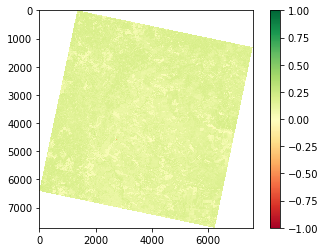

In [11]:
plt.imshow(array_NBR2, cmap='RdYlGn')
plt.colorbar()
plt.show()
plt.show()